In [143]:
# for data analysis
import pandas as pd

In [144]:
# for data visualization
import seaborn as sns

In [145]:
# for machine learning process
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<h2>Let's start the analysis</h2>
<p>
    <article>
        Let's start loading the data, our objetive is to indentidfy and predict Titanic survivors
    </article>
</p>

In [146]:
train_df = pd.read_csv(r"C:\Users\rafae\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\rafae\Downloads\test.csv")
combine = [train_df, test_df]

<p>Checking columns names and the loaded data</p>

In [147]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [148]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>
    As you can see, we have identified some columns with 'NAN' values (we will deal with this later), let's go deeper into the subset of data
</p>

In [149]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Natsch, Mr. Charles H",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


<p>
    This is fantastic, we have 891 unique values, the main information for the name, doesn't mean much to us this time, because they are all unique values, we hope to have only one Mr. John Hugo here... (I hope...)
</p>
<p>
    Let's search for empty values.
</p>

In [150]:
train_df.isna().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<p>
    We have considerable NAN values at column Embarked, Age, Cabin
</p>
<p>
    Let's try to solve this
</p>

In [151]:
train_df['Embarked'].describe()
train_df['Age'].describe()
train_df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [152]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [153]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [154]:
train_df['Age'] = train_df['Age'].fillna(30)
train_df['Age'] = train_df['Age'].astype(int)

In [155]:
train_df = train_df.drop(columns=['Cabin','PassengerId','Ticket','Name'])

In [156]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


To solve the problem of shipping data, we use the item with the highest Value.

I looked for some value with correlation with age to help me, but there are none, only some with little correlation. for example I could have used a boxplot and seen according to the class, which estimated age for the person.

For age, we chose to use the average value.

As for the Cabin and other columns like Passenger Id , Name and Ticket, they will make no difference to our analysis.

In [157]:
train_df.isna().sum().sort_values(ascending=True)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Let's see how much survivors we have in this dataset

<AxesSubplot:xlabel='count', ylabel='Survived'>

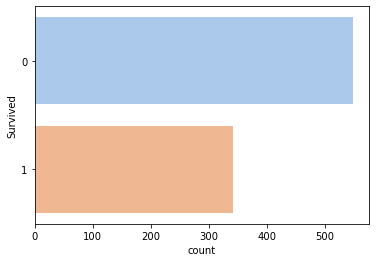

In [158]:
sns.countplot(y = 'Survived', data = train_df, palette='pastel')

In [159]:
train_df[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [160]:
train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [161]:
train_df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


The highest survival rate is for females, so if you traveled alone... your chances of survival were high...

Or have some money for the first class...

And what about kids?

In [162]:
train_df.loc[(train_df['Age'] < 10), 'Classification'] = 'Infant'
train_df.loc[(train_df['Age'] > 10) & (train_df['Age'] < 17), 'Classification'] = 'Teenager'
train_df.loc[(train_df['Age']) >= 18, 'Classification'] = "Adult"

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Classification
0,0,3,male,22,1,0,7.2500,S,Adult
1,1,1,female,38,1,0,71.2833,C,Adult
2,1,3,female,26,0,0,7.9250,S,Adult
3,1,1,female,35,1,0,53.1000,S,Adult
4,0,3,male,35,0,0,8.0500,S,Adult
5,0,3,male,30,0,0,8.4583,Q,Adult
6,0,1,male,54,0,0,51.8625,S,Adult
7,0,3,male,2,3,1,21.0750,S,Infant
8,1,3,female,27,0,2,11.1333,S,Adult
9,1,2,female,14,1,0,30.0708,C,Teenager


Converting into dummies

In [163]:
train_df['Sex'] = pd.get_dummies(train_df['Sex'], drop_first=True)
train_df['Classification'] = pd.get_dummies(train_df['Classification'], drop_first=True)
train_df['Embarked'] = pd.get_dummies(train_df['Embarked'], drop_first=True)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Classification
0,0,3,1,22,1,0,7.2500,0,0
1,1,1,0,38,1,0,71.2833,0,0
2,1,3,0,26,0,0,7.9250,0,0
3,1,1,0,35,1,0,53.1000,0,0
4,0,3,1,35,0,0,8.0500,0,0


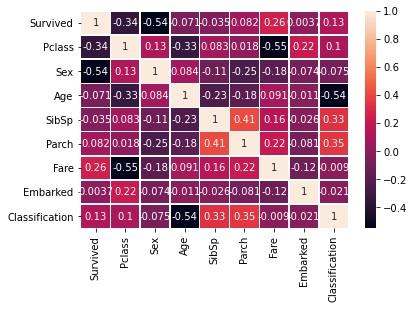

In [164]:
ax = sns.heatmap(train_df.corr(), annot=True, linewidths=.5)

In [165]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Classification
0,0,3,1,22,1,0,7.2500,0,0
1,1,1,0,38,1,0,71.2833,0,0
2,1,3,0,26,0,0,7.9250,0,0
3,1,1,0,35,1,0,53.1000,0,0
4,0,3,1,35,0,0,8.0500,0,0


<h2>Creating the model</h2>

In [166]:
X = train_df.iloc[:, [1,2,3,4,5,6,7,8]].values
Y = train_df.iloc[:, 0].values
X

array([[ 3.    ,  1.    , 22.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  0.    , 38.    , ..., 71.2833,  0.    ,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  7.925 ,  0.    ,  0.    ],
       ...,
       [ 3.    ,  0.    , 30.    , ..., 23.45  ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  7.75  ,  1.    ,  0.    ]])

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2, random_state=42)

# Criando nosso modelo

In [168]:
MLP_Classif = MLPClassifier(max_iter=250)
MLP_Classif.fit(x_train, y_train)

MLPClassifier(max_iter=250)

# Testando nosso modelo

In [169]:
y_pred = MLP_Classif.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

# Avaliando nosso modelo

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[85, 20],
       [21, 53]], dtype=int64)

In [171]:
print(classification_report(y_test, y_pred)) #Rafa

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

